In [1]:
import pandas as pd
import ast
import re
import statistics
import matplotlib.pyplot as plt
from labeling_tool import Trie, TrieNode, search_in_trie

['nosql', 'swagger', 'postman', 'kibana', 'software development', 'cypress', 'sql', 'solid']
>5 years working on qa
working knowledge of:
sql & nosql databases
postman, insomnia and/or swagger
kibana
sentry
background in development
comfortable presenting to large internal groups and leadership team members
experience developing integration tests with cypress or similar
analytical skills
team player
have a solid understanding of the entire software development life cycle
have the ability to learn quickly and manage yourself independently
fluency in english
don't fulfill all the criteria? don't worry - they're just meant as a rough description of what we're looking for


In [2]:
df = pd.read_csv('extracted_TopDev.csv')

In [3]:
# df['company_position'] = df['company_position'].apply(ast.literal_eval)
df['job_detail_job_requirements_line'] = df['job_detail_job_requirements_line'].apply(ast.literal_eval)
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(ast.literal_eval)
df['job_detail_job_level'] = df['job_detail_job_level'].apply(ast.literal_eval)

In [4]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://topdev.vn/viec-lam/specialist-supervis...,TopDev,2024-04-18 11:11:32,Chubb Life Vietnam,"Head Office at: Tầng 21, Sun Wah Tower, 115 Ng...",500-999,"Specialist/ Supervisor, Java Software Engineer",False,False,False,"[Bachelor degree in IT/ Computer science, From...",[From 3 years experience in Java/ Java EE],[]
1,https://topdev.vn/viec-lam/ux-ui-designer-ts03...,TopDev,2024-04-18 11:11:47,Talent Success,"Hà Nội, Thành phố Hà Nội",25-99,UX/UI Designer_TS030601-UX/UI,False,False,False,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,[]
2,https://topdev.vn/viec-lam/it-senior-project-m...,TopDev,2024-04-18 11:11:50,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Senior Project Manager,False,False,False,[At least 5 years’ experience leading IT proje...,[At least 5 years’ experience leading IT proje...,[senior]
3,https://topdev.vn/viec-lam/ho-it-business-anal...,TopDev,2024-04-18 11:11:58,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,HO - IT Business Analyst,False,False,False,[Bachelor's degree preferably in Computer Scie...,[At least 3 years of working experience of whi...,[]
4,https://topdev.vn/viec-lam/it-network-solution...,TopDev,2024-04-18 11:12:01,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Network Solution Architect,False,False,False,"[As the Network Solution Architect, you are ex...",[],[]


In [5]:
# tmp_df = df.loc[(df['job_detail_full_time'] == False) & (df['job_detail_remote'] == False) & (df['job_detail_hybrid'] == False)]
# tmp_df.info()

In [6]:
df.loc[(df['job_detail_remote'] == True)].head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_full_time,job_detail_remote,job_detail_hybrid,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
28,https://topdev.vn/viec-lam/hcm-react-native-de...,TopDev,2024-04-18 11:13:22,Talent Success,"Hồ Chí Minh, Thành phố Hồ Chí Minh",25-99,HCM - React Native Developer_TS032401-MTS,False,True,False,[Minimum 2-3 years experience on developing wi...,[Minimum 2-3 years experience on developing wi...,[]
61,https://topdev.vn/viec-lam/ky-su-it-network-cs...,TopDev,2024-04-18 11:15:18,LG CNS Việt Nam,"Tầng 15, tòa Keangnam Landmark 72, Phường Mễ T...",100-499,"Kỹ Sư IT Network (CSR Firewall, Networking, En...",False,True,False,"[Bắt buộc, Tốt nghiệp đại học trở lên, ưu tiê...",[],[]
62,https://topdev.vn/viec-lam/mobile-android-deve...,TopDev,2024-04-18 11:15:21,LG CNS Việt Nam,"Tầng 15, tòa Keangnam Landmark 72, Phường Mễ T...",100-499,Mobile Android Developer,False,True,False,"[Tốt nghiệp đại học, ưu tiên chuyên ngành Công...",[Có ít nhất 3 năm kinh nghiệm làm việc và phát...,[]
67,https://topdev.vn/viec-lam/mid-mts-mobile-trad...,TopDev,2024-04-18 11:15:42,DaouKiwoom Innovation,"AP Tower, 518B Điện Biên Phủ, Phường 21, Quận ...",25-99,Mid MTS (Mobile Trading System) Developer - An...,False,True,False,"[Skills Required, Minimum 2-3 years of profess...",[Minimum 2-3 years of professional experience ...,[]
68,https://topdev.vn/viec-lam/mid-hts-home-tradin...,TopDev,2024-04-18 11:15:38,DaouKiwoom Innovation,"AP Tower, 518B Điện Biên Phủ, Phường 21, Quận ...",25-99,Mid HTS (Home Trading System) Developer - Wind...,False,True,False,"[Skill Required, Minimum 2-3 years experience ...",[Minimum 2-3 years experience on developing wi...,[]


In [7]:
df.iloc[36]['url']

'https://topdev.vn/viec-lam/it-security-specialist-public-bank-vietnam-pbvn-2032962'

In [8]:
print(df[df['job_detail_job_level'].apply(lambda x: 'intern' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'fresher' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'junior' in x)].count())
print(df[df['job_detail_job_level'].apply(lambda x: 'senior' in x)].count())

url                                 2
source                              2
crawl_date                          2
company_name                        2
company_position                    2
company_size                        2
job_detail_name                     2
job_detail_full_time                2
job_detail_remote                   2
job_detail_hybrid                   2
job_detail_job_requirements_line    2
job_detail_year_of_exp              2
job_detail_job_level                2
dtype: int64
url                                 4
source                              4
crawl_date                          4
company_name                        4
company_position                    4
company_size                        4
job_detail_name                     4
job_detail_full_time                4
job_detail_remote                   4
job_detail_hybrid                   4
job_detail_job_requirements_line    4
job_detail_year_of_exp              4
job_detail_job_level                4

In [9]:
df['job_detail_hybrid'] = False
df.loc[(df['job_detail_remote'] == True) & (df['job_detail_full_time'] == True), 'job_detail_hybrid'] = True

In [10]:
df = df.drop('job_detail_remote', axis=1)

In [11]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_full_time,job_detail_hybrid,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://topdev.vn/viec-lam/specialist-supervis...,TopDev,2024-04-18 11:11:32,Chubb Life Vietnam,"Head Office at: Tầng 21, Sun Wah Tower, 115 Ng...",500-999,"Specialist/ Supervisor, Java Software Engineer",False,False,"[Bachelor degree in IT/ Computer science, From...",[From 3 years experience in Java/ Java EE],[]
1,https://topdev.vn/viec-lam/ux-ui-designer-ts03...,TopDev,2024-04-18 11:11:47,Talent Success,"Hà Nội, Thành phố Hà Nội",25-99,UX/UI Designer_TS030601-UX/UI,False,False,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,[]
2,https://topdev.vn/viec-lam/it-senior-project-m...,TopDev,2024-04-18 11:11:50,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Senior Project Manager,False,False,[At least 5 years’ experience leading IT proje...,[At least 5 years’ experience leading IT proje...,[senior]
3,https://topdev.vn/viec-lam/ho-it-business-anal...,TopDev,2024-04-18 11:11:58,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,HO - IT Business Analyst,False,False,[Bachelor's degree preferably in Computer Scie...,[At least 3 years of working experience of whi...,[]
4,https://topdev.vn/viec-lam/it-network-solution...,TopDev,2024-04-18 11:12:01,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Network Solution Architect,False,False,"[As the Network Solution Architect, you are ex...",[],[]


# Step 2

In [12]:
df.iloc[4]['url']

'https://topdev.vn/viec-lam/it-network-solution-architect-ngan-hang-a-chau-acb-2032713'

In [13]:
time_unit = [
    'years',
    'year',
    'months',
    'month',
    'năm',
    'tháng'
]
pattern = f"(\S+)\s({'|'.join(time_unit)})(?!(?:\s*old|s\sold)\b)"
print(pattern)
def extract_year(year_exp):
    matches = re.findall(pattern, year_exp)
    # print(pattern)
    res = []
    for match in matches:
        res.append(match[0] + ' ' + match[1])
    return res

def get_the_experience(list_string):
    tmp_list_string = [extract_year(string) for string in list_string]
    while len(tmp_list_string) != 0:
        if len(tmp_list_string[0]) == 0:
            tmp_list_string.pop(0)
        else:
            break
    if len(tmp_list_string) == 0:
        return None
    first_line_experience = tmp_list_string[0]
    while len(first_line_experience) != 0:
        if re.search(r'\d+', first_line_experience[0]) is None:
            first_line_experience.pop(0)
        else:
            break
    if len(first_line_experience) == 0:
        return None
    number = int(re.findall(r'\d+', first_line_experience[0])[0])
    if 'tháng' in first_line_experience[0] or \
        'month' in first_line_experience[0] or \
        'months' in first_line_experience[0]:
        number = float(number/12)
    return number


(\S+)\s(years|year|months|month|năm|tháng)(?!(?:\s*old|s\sold)


In [14]:
df['job_detail_year_of_exp'] = df['job_detail_year_of_exp'].apply(get_the_experience)

In [15]:
df.head()

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_full_time,job_detail_hybrid,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://topdev.vn/viec-lam/specialist-supervis...,TopDev,2024-04-18 11:11:32,Chubb Life Vietnam,"Head Office at: Tầng 21, Sun Wah Tower, 115 Ng...",500-999,"Specialist/ Supervisor, Java Software Engineer",False,False,"[Bachelor degree in IT/ Computer science, From...",3.0,[]
1,https://topdev.vn/viec-lam/ux-ui-designer-ts03...,TopDev,2024-04-18 11:11:47,Talent Success,"Hà Nội, Thành phố Hà Nội",25-99,UX/UI Designer_TS030601-UX/UI,False,False,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,2.0,[]
2,https://topdev.vn/viec-lam/it-senior-project-m...,TopDev,2024-04-18 11:11:50,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Senior Project Manager,False,False,[At least 5 years’ experience leading IT proje...,5.0,[senior]
3,https://topdev.vn/viec-lam/ho-it-business-anal...,TopDev,2024-04-18 11:11:58,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,HO - IT Business Analyst,False,False,[Bachelor's degree preferably in Computer Scie...,3.0,[]
4,https://topdev.vn/viec-lam/it-network-solution...,TopDev,2024-04-18 11:12:01,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Network Solution Architect,False,False,"[As the Network Solution Architect, you are ex...",NaN,[]


In [16]:
df.loc[df['job_detail_year_of_exp'].isna()]['url']

4      https://topdev.vn/viec-lam/it-network-solution...
8      https://topdev.vn/viec-lam/chuyen-vien-tu-van-...
9      https://topdev.vn/viec-lam/di5-senior-java-dev...
11     https://topdev.vn/viec-lam/lg-track-program-fo...
15     https://topdev.vn/viec-lam/system-netwok-engin...
                             ...                        
266    https://topdev.vn/viec-lam/backend-developer-m...
268    https://topdev.vn/viec-lam/ky-su-phat-trien-fr...
269    https://topdev.vn/viec-lam/devops-engineer-azu...
270    https://topdev.vn/viec-lam/ky-su-phat-trien-de...
275    https://topdev.vn/viec-lam/ky-su-van-hanh-aws-...
Name: url, Length: 109, dtype: object

In [17]:
df['job_detail_year_of_exp'].isnull().sum()

109

In [18]:
df['job_detail_year_of_exp'].describe()

count    167.000000
mean       2.988024
std        1.598147
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       12.000000
Name: job_detail_year_of_exp, dtype: float64

In [19]:
df['job_detail_year_of_exp'].idxmax()

242

In [20]:
df.iloc[242]['url']

'https://topdev.vn/viec-lam/head-of-development-it-department-head-office-public-bank-vietnam-pbvn-2032894'

# Use the highest requirements levels

In [21]:
df['job_detail_job_level'] = df['job_detail_job_level'].map(lambda x: None if len(x) == 0 else x[-1])

In [22]:
df.loc[df['job_detail_job_level'] != None].count()

url                                 276
source                              276
crawl_date                          276
company_name                        276
company_position                    276
company_size                        276
job_detail_name                     276
job_detail_full_time                276
job_detail_hybrid                   276
job_detail_job_requirements_line    276
job_detail_year_of_exp              167
job_detail_job_level                 52
dtype: int64

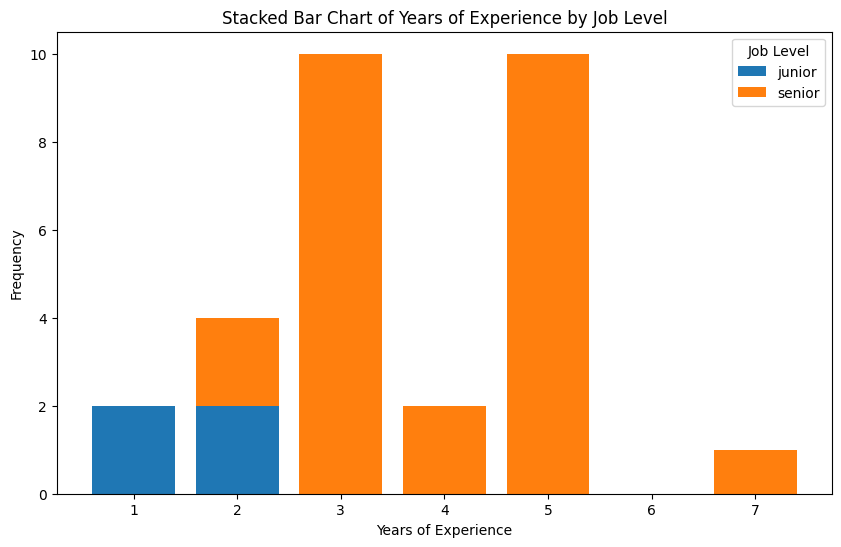

In [23]:
# Order the job levels
job_level_order = ['junior', 'senior']

# Group the DataFrame by 'job_detail_year_of_exp' and 'job_detail_job_level' and count the occurrences
grouped = df.groupby(['job_detail_year_of_exp', 'job_detail_job_level']).size().unstack(fill_value=0)

# Reorder the columns based on the specified order
grouped = grouped[job_level_order]

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))

# Loop through each job level and plot a stacked bar for each year of experience
bottom = None
for job_level in grouped.columns:
    plt.bar(grouped.index, grouped[job_level], label=job_level, bottom=bottom)
    if bottom is None:
        bottom = grouped[job_level]
    else:
        bottom += grouped[job_level]

plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Years of Experience by Job Level')
plt.legend(title='Job Level')
plt.show()

In [24]:
display(df.head(5))

,url,source,crawl_date,company_name,company_position,company_size,job_detail_name,job_detail_full_time,job_detail_hybrid,job_detail_job_requirements_line,job_detail_year_of_exp,job_detail_job_level
0,https://topdev.vn/viec-lam/specialist-supervis...,TopDev,2024-04-18 11:11:32,Chubb Life Vietnam,"Head Office at: Tầng 21, Sun Wah Tower, 115 Ng...",500-999,"Specialist/ Supervisor, Java Software Engineer",False,False,"[Bachelor degree in IT/ Computer science, From...",3.0,None
1,https://topdev.vn/viec-lam/ux-ui-designer-ts03...,TopDev,2024-04-18 11:11:47,Talent Success,"Hà Nội, Thành phố Hà Nội",25-99,UX/UI Designer_TS030601-UX/UI,False,False,[Có ít nhất 2 năm kinh nghiệm làm UX/UI cho ga...,2.0,None
2,https://topdev.vn/viec-lam/it-senior-project-m...,TopDev,2024-04-18 11:11:50,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Senior Project Manager,False,False,[At least 5 years’ experience leading IT proje...,5.0,senior
3,https://topdev.vn/viec-lam/ho-it-business-anal...,TopDev,2024-04-18 11:11:58,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,HO - IT Business Analyst,False,False,[Bachelor's degree preferably in Computer Scie...,3.0,None
4,https://topdev.vn/viec-lam/it-network-solution...,TopDev,2024-04-18 11:12:01,NGÂN HÀNG Á CHÂU (ACB),"444 Cách Mạng Tháng Tám, Phường 11, Quận 3, Th...",Hơn 1000,IT - Network Solution Architect,False,False,"[As the Network Solution Architect, you are ex...",NaN,None


In [25]:
# # problem: '.', ',' in salary; 'usd' and 'trieu' is wrong 

# metric_dict = {
#     'vnd': 1,
#     'triệu': 1000000,
#     'tr': 1000000,
#     'usd': 25000
# }

# def extract_salary(salary):
#     matches = re.findall(r'[-+]?(?:\d*\.*\d+)', salary.replace(',', ''))
#     number = -1
#     if len(matches) == 0:
#         return []
#     for metric in metric_dict.keys():
#         if metric in salary.lower():
#             number = metric_dict[metric]
#     if 'usd' in salary.lower():
#         matches = [match.replace('.', '') for match in matches]
#         if float(matches[0]) > 5000000:
#             number = 1
#     if float(matches[0]) < 10000:
#         number = 25000
#         # print(matches)
#     return [float(match) * (number if float(match)<5000000 else 1) for match in matches]

# df['job_detail_salary_range'] = df['job_detail_salary'].map(extract_salary)
# df['job_detail_currency'] = df['job_detail_salary'].map(lambda x: 'usd' if 'usd' in x.lower() else None)
# df['new_col'] = df['job_detail_salary_range'].map(lambda x: len(x))
# # display(df['job_detail_salary_range'].describe())
# display(df.head(5))
# display(df.loc[df['new_col'] == 4])

In [26]:
# display(df.loc[df['job_detail_salary_range'].apply(lambda x: len(x)) > 2])

In [27]:
# df['job_detail_salary_range_max'] = df['job_detail_salary_range'].apply(lambda x: x[-1] if len(x) != 0 else 0)
# df['job_detail_salary_range_min'] = df['job_detail_salary_range'].apply(lambda x: x[0] if len(x) == 2 else 0)

In [28]:
# df.head(5)

In [29]:
# plt.boxplot(
#     df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'])]
# )

In [30]:
# df['job_detail_salary_range_max'].loc[(df['job_detail_salary_range_max'] != 0) & (df['job_detail_salary_range_max'])].idxmax()

In [31]:
# build tree
f = open("skill_list.txt", "r")
skill_list = list(f)
trie_directory = '/trie_struture'
skill_list = [x.lower() for x in skill_list]

# for x in df['job_detail_job_requirements']:
#     skill_list.extend(x)

skill_list = list(set(skill_list))

file = open('skill_list.txt','w')
for skill in skill_list:
	file.write(skill.replace('\n', '').rstrip()+"\n")
file.close()

trie = Trie()
for skill in skill_list:
    trie.insert(skill)

In [32]:
def extract_skill(lines):
    res = []
    for line in lines:
        res.extend(search_in_trie(trie, line))
    return res

In [33]:
df['job_detail_extracted_skill'] = df['job_detail_job_requirements_line'].apply(extract_skill)

In [34]:
df.to_csv('transformed_TopDev.csv', index=False)